In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
df = pd.read_csv("Student_performance_data.csv")
X = df.drop('GradeClass', axis=1)
y = df['GradeClass']

y_encoded = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))  

In [41]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
es = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    callbacks=[es])

Epoch 1/50
48/48 [==============================] - 1s 6ms/step - loss: 1.1533 - accuracy: 0.5111 - val_loss: 0.9766 - val_accuracy: 0.6136
Epoch 2/50
48/48 [==============================] - 0s 2ms/step - loss: 0.8217 - accuracy: 0.7078 - val_loss: 0.8670 - val_accuracy: 0.6789
Epoch 3/50
48/48 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.7706 - val_loss: 0.7644 - val_accuracy: 0.7520
Epoch 4/50
48/48 [==============================] - 0s 2ms/step - loss: 0.6019 - accuracy: 0.8033 - val_loss: 0.6960 - val_accuracy: 0.7467
Epoch 5/50
48/48 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.8216 - val_loss: 0.6723 - val_accuracy: 0.7415
Epoch 6/50
48/48 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.8379 - val_loss: 0.6021 - val_accuracy: 0.7833
Epoch 7/50
48/48 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.8484 - val_loss: 0.5645 - val_accuracy: 0.7728
Epoch 8/50
48/48 [==

In [43]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

15/15 [==============================] - 0s 1ms/step - loss: 0.5004 - accuracy: 0.8246
Test Accuracy: 0.82


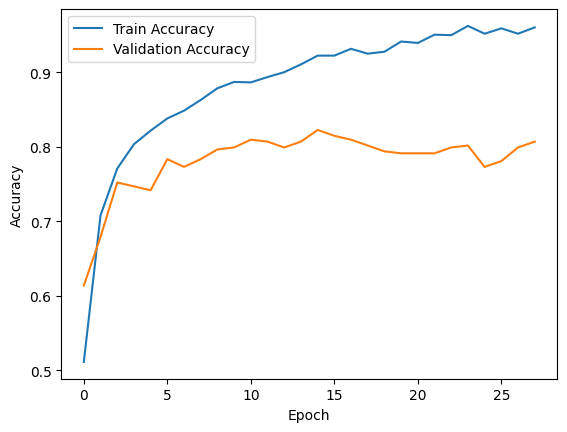

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()